# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [325,356,420]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, diag_kind='kde');display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,32717,16784,13626,60869,1272,5609
1,22686,134,218,3157,9,548
2,4456,5266,13227,25,6818,1393


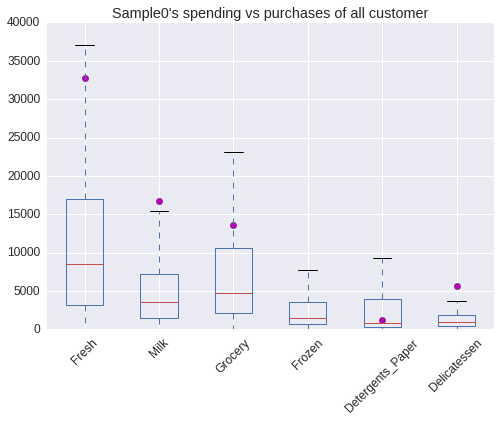

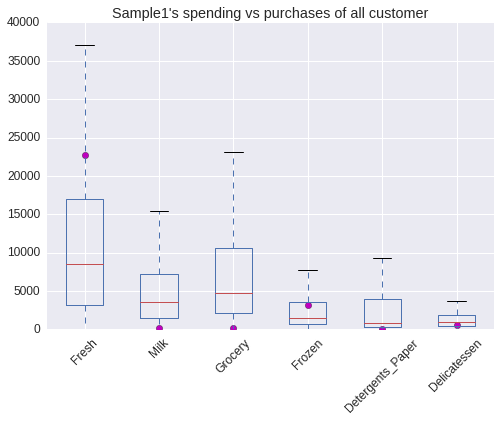

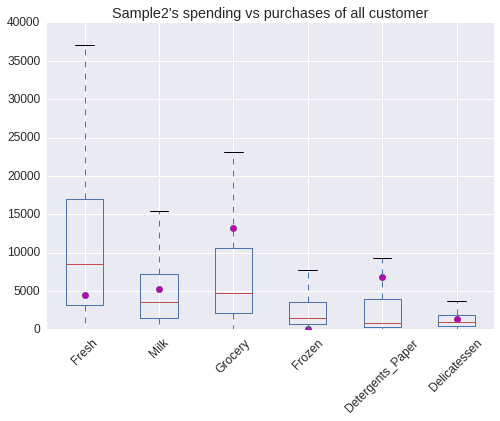

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

for name in samples.index:
    data.plot.box();
    plt.ylim(0,40000)
    plt.xticks(rotation=45);
    xs = [1,2,3,4,5,6]
    plt.scatter(x=xs,y=samples.loc[name],c='m',s=40);
    plt.title('Sample'+str(name)+"'s spending vs purchases of all customer");

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- The first customer spends above average on all categories. The spendings on `Frozen`, `Milk`, and `Delicatessen` are beyond the 1.5 times the interquartile range (IQR) from the upper quartile (Q3). This customer also spends more than Q3 on `Fresh` and `Grocery`. Considering this purchases, **sample0** could be a large supermarket.

- The second sample sepends more than average on `Fresh` and `Frozen` products. However, its spending is below mean on other categories. It can be seen that its spending is lower than first quartile (Q1) for `Milk`, `Grocery` and `Detergents_paper`. Therefore, **sample1** could be a local market. 

- The third sample's spending on `Detergents_Paper` and `Grocery` is more than Q3. This customer spends more than average on `Milk`, but less than Q1 on `Frozen` products. **Sample2** could be hotel with a restuarant

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Frozen', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data.Frozen, test_size=0.25, random_state =33)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=55).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print(score)

-0.676173598615


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I tried to predict `Frozen` using other features. The R^2 score was negative which indicates that it is not related to other features. Therefore, we need to retain this feature to be able to predict customers' spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

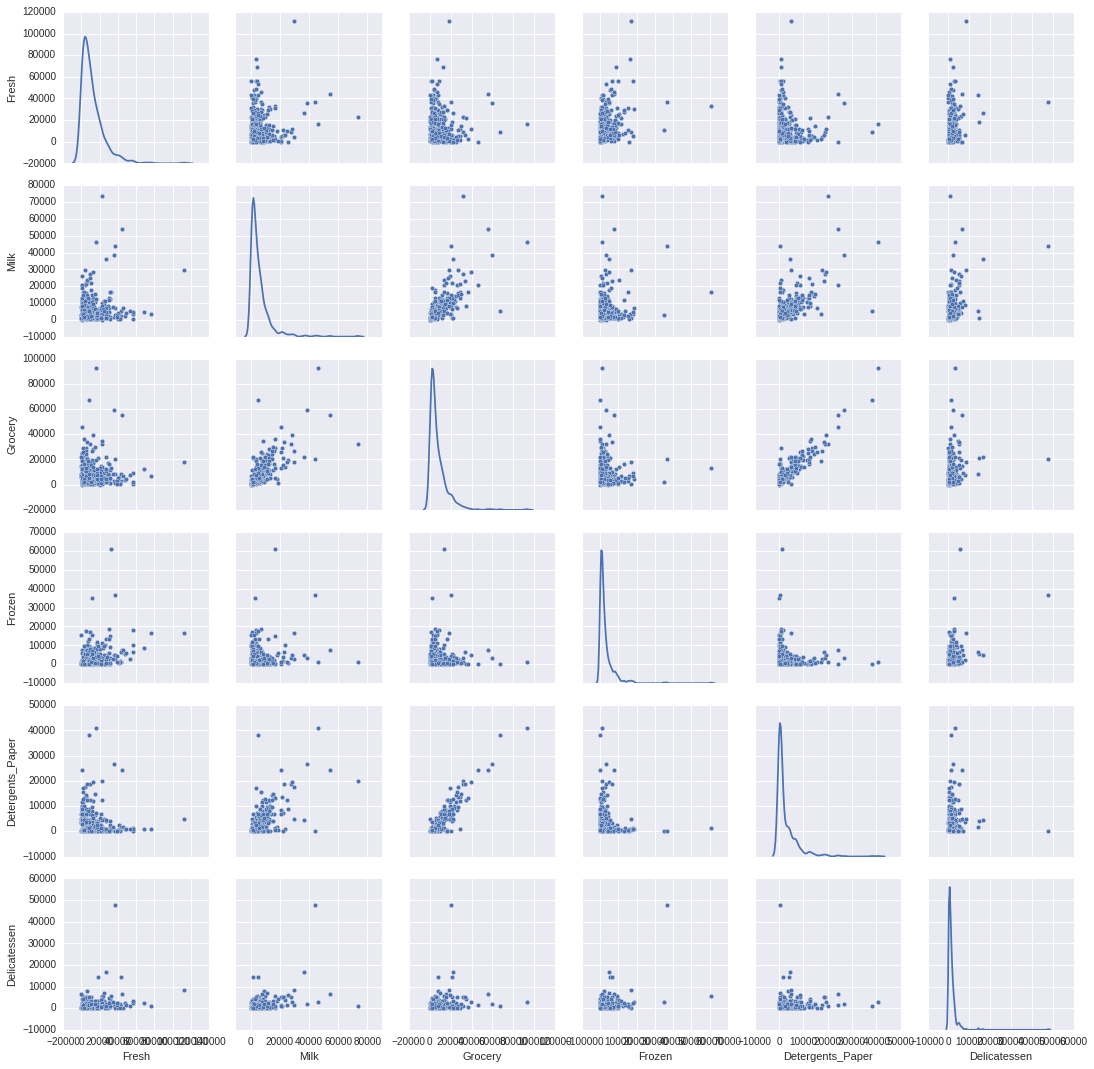

In [8]:
# Produce a scatter matrix for each pair of features in the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, diag_kind='kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

It seems that there is a correlation between `Milk` and `Grocery`, `Milk` and `Detergents_Paper`, as well as `Grocery` and `Detergents_Paper`. However, `Frozen` is not correlated with other categories. The correlation between all features can be observed more clearly in the following heatmap. 

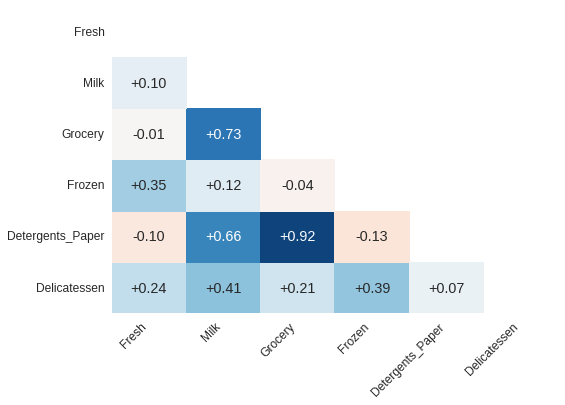

In [394]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)
    plt.xticks(rotation=45, ha='right');

It appears that the data does not normally distributed and the distributions for all categories are skewed towards right. This can be furthur investigated by setting up a hypothesis testing. The null hypothesis is that the data is coming from a normally distributed population. The alternative hypothesis is that data is not from a normally distributed population. 

The p-value of all features is extremely small which indicates that it is unlikely that the data comes from a normal distribution. 

In [18]:
# Setting up a hypothesis testing to investigate if it is normally distributed.  
# The null hypothesis is that the data is coming from a normal distribution. 
# Alternative hypothesis is that data is not coming from a normal distribution
import scipy.stats as stats

for feature in data.columns:
    print 'P-value for %s is %s' % (feature,stats.normaltest(data[feature])[1])


P-value for Fresh is 2.67591738559e-60
P-value for Milk is 6.72503458624e-90
P-value for Grocery is 6.05161258358e-82
P-value for Frozen is 1.74303502825e-119
P-value for Detergents_Paper is 1.8210735948e-81
P-value for Delicatessen is 5.46331571708e-173


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

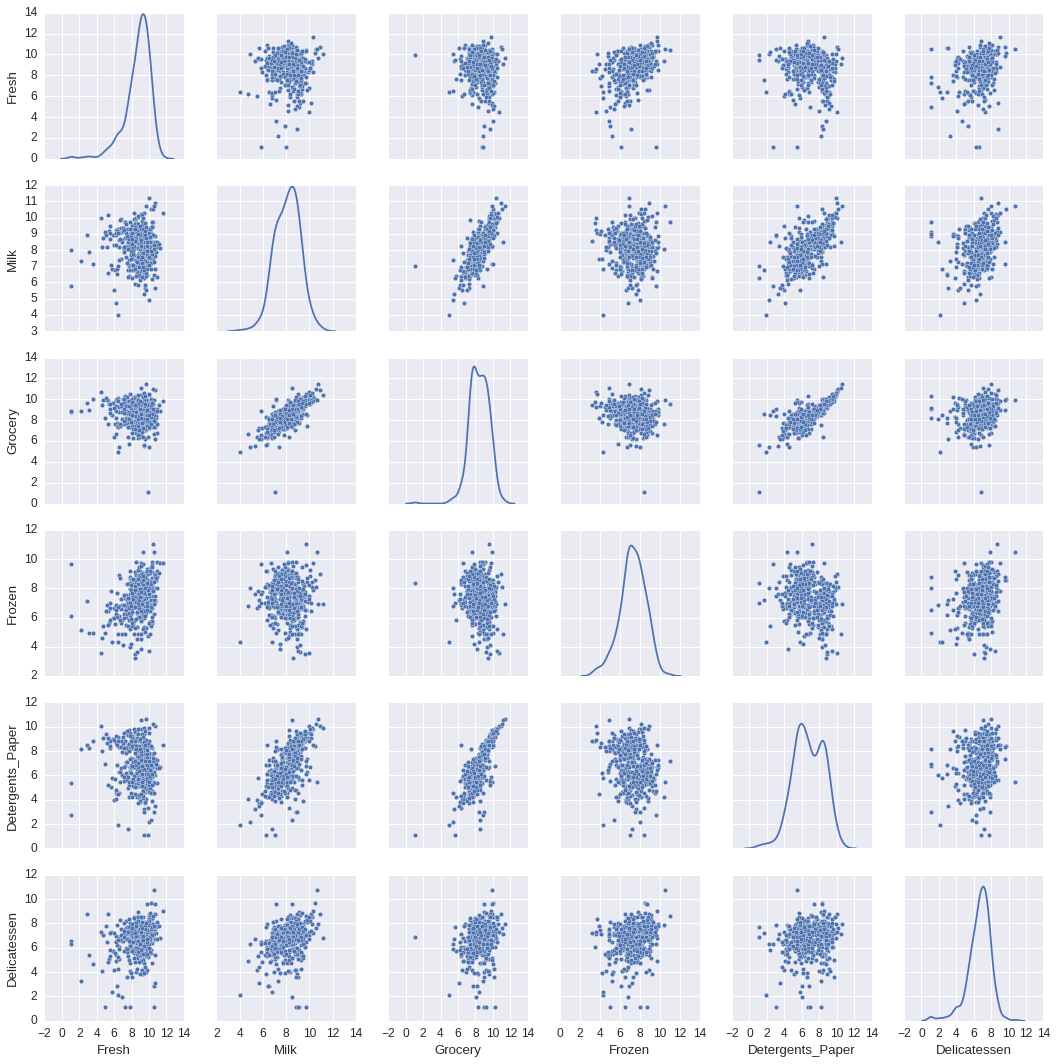

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, diag_kind= 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [19]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
1,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275
2,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


The following figure is a plot of feature distributions after the log-transformation.

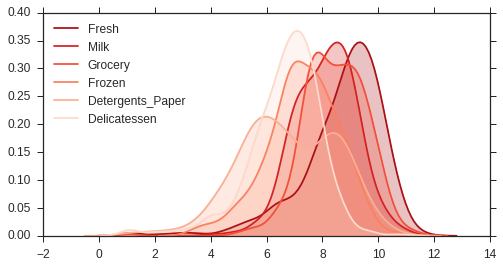

In [395]:
sns.set_style('ticks') ## specify plot style
# set color scheme
with sns.color_palette("Reds_r"):

    # plot densities of log-transformed data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc=2);


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [291]:
# For each feature find the data points with extreme high or low values
outliers_indices = set()
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    df_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers_indices.update(df_outliers.index.tolist())
    display(df_outliers)
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


A list of indices for sample points that could be potentialy outliers are shown above. Further investigation shows that observation for which the indices are 65, 66, 75, 128, 154 have more than one features outside of 1.5*IQL. We can simply consider these points as outliers. Alternatively, we can use a outlier ditection approach to capture outliers. 

Since the transformed data in logaritmic scale looks more normal, we can use EllipticEnvelope to find outliers in the data set.

In [300]:
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

index_list = np.array(list(outliers_indices))
normal_data = log_data.drop(index_list)
possible_outliers_data = log_data.loc[index_list].as_matrix()
# a random subset of inlier data is selected to fit to EllipticEnvelope and 
# the rest of the data is used to test the trained model
X_train_df = normal_data.sample(frac=0.8)
X_train = X_train_df.as_matrix()
X_test = normal_data.drop(X_train_df.index).as_matrix()
clf = EllipticEnvelope(contamination = 0.025)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(possible_outliers_data)

In [301]:
print 'Training accuracy is :', (1.-float(y_pred_train[y_pred_train == -1].size)/float(y_pred_train.size))*100
print 'Testing accuracy is: ', (1.-float(y_pred_test[y_pred_test == -1].size)/float(y_pred_test.size))*100.
outliers = index_list[y_pred_outliers == -1].tolist()

Training accuracy is : 97.4842767296
Testing accuracy is:  100.0


In [302]:
# OPTIONAL: Select the indices for data points you wish to remove
print'These points are outliers: ',outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

These points are outliers:  [128, 142, 154, 412, 184, 187, 65, 66, 75, 338, 218, 95, 96, 357, 233, 109, 183]


Compared to our inital guess (i.e. [65, 66, 75, 128, 154]), the EllipticEnvelope suggests that more points are outliers and needs to be removed from the dataset. 

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

As pointed out, the sample points [65, 66, 75, 128, 154] were repeated in more than one feature as outliers. Therefore, my initial guess was that these points are outliers. However, it was not possible to draw any conclusion about the rest of data points for which only one feature was identified as outlier. Therefore, I used EllipticEnvelope to detect the outliers. The EllipticEnvelope with a contamination of 0.025 suggested that in addition to [65, 66, 75, 128, 154], some other points are potentially outliers and can be removed from the data set. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

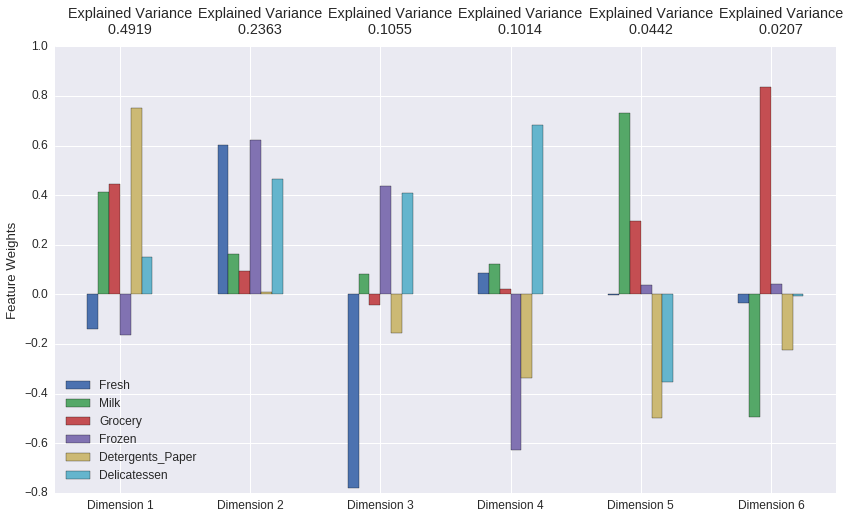

In [412]:
sns.set_style("darkgrid")
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [396]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4919
Dimension 2    0.7282
Dimension 3    0.8337
Dimension 4    0.9351
Dimension 5    0.9793
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


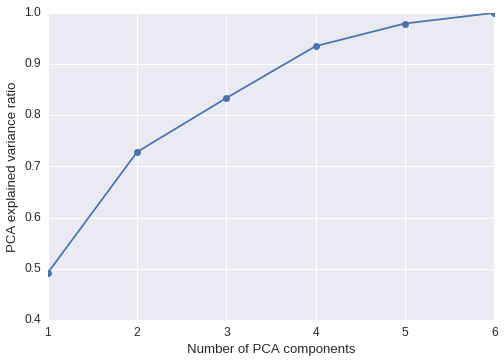

In [417]:
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o');
plt.xlabel('Number of PCA components');
plt.ylabel('PCA explained variance ratio');

**Answer:**

The total varience ratio in the data correspounding to first and second principal component is 0.7282.

The **first component** is positively correlated to spending on `Detergents_papers` and then on `Grocery` and `Milk`. Furthermore, it appears that the customer who spend more on these categories tend to spend less on `Fresh`, `Frozen`, and `Delicatessen`.

The **second component** shows that some customers spend almost even on `Frozen`, `Fresh`, and then `Delicatessen`, but less on other categories. 

The **third component** has a strong negative correlation with `Fresh` while some noticeable positive correlation with `Frozen` and `Delicatessen`. This indicates that customers that buy a lot of `Fresh` products tends to buy less `Frozen` materials.    

The **fourth component** as a strong positive correlation with spending on `Delicatessen` and a strong negative correlation with `Frozen`, and some negative correlation with `Detergents_papers`. It seems that the customers that purchase a lot of `Delicatessen` spends less on `Frozen` and `Detergents_papers`. 

In total, the first four principal components explain 93.51% of variance in the data. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [313]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8675,4.4475,1.2058,-0.7877,0.7986,0.1370
1,-6.4989,0.0927,-0.2096,0.4405,-0.7825,0.0590
2,2.9723,-2.4242,-1.5565,2.2733,-0.6920,0.0436


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [314]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [315]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.8675,4.4475
1,-6.4989,0.0927
2,2.9723,-2.4242


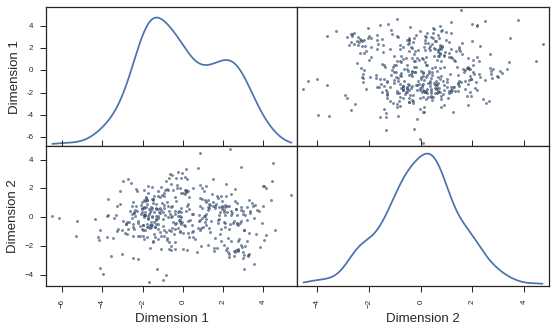

In [397]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

- K-means is a very simple, easy to understand, with a low computational cost. However, it is prone to local optima. It uses the Euclidean distance to identify clusters; therefore, capturing non circular clustures is difficult.

- Gaussian mixture model uses Gaussian probability distribution to identify the clusters. As such, it can better capture latent pattern in the data and cluster overlapping. Moreover, as opposed to K-mean, it can describe ellipsoidal clustures. Gaussian mixture is also prone to local optima. 

A look at the scatter plot of reduced_data suggest that there seems to be two distinct clusters in the data. Although the computational cost is not a concern in this work, K-mean seems to be able to work fine on this data set. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [325]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state = 33).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,clusterer.labels_)
print 'The silhouette score is : ', score

The silhouette score is :  0.438792092109


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

In [328]:
n_clusters = [2,3,4,5]
scores = []
for n_cluster in n_clusters:
    clusterer = KMeans(n_clusters=n_cluster, random_state=33).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    scores.append(silhouette_score(reduced_data,clusterer.labels_))
    
print zip(n_clusters,scores)

[(2, 0.4387920921091073), (3, 0.34794085866274937), (4, 0.32633973726802151), (5, 0.35220714761893374)]


**Answer:**

Considering the silhouette scores, two clusteres with a score of 0.4388 describes the data the best. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

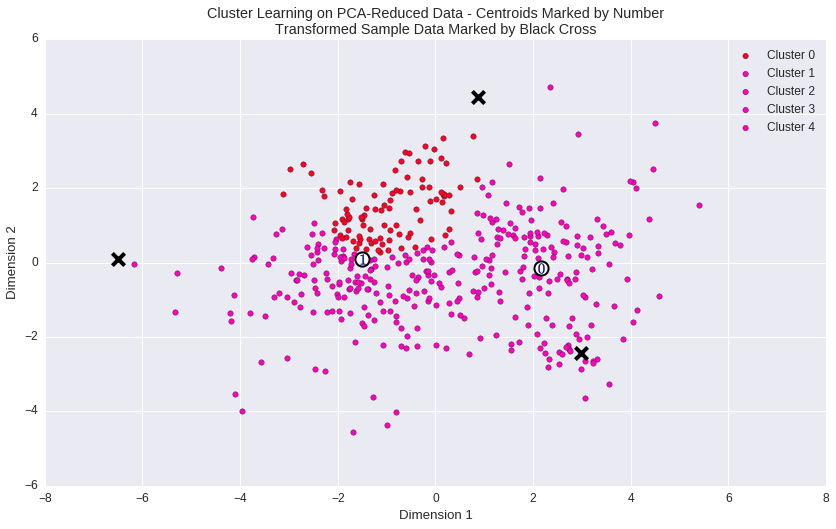

In [329]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

In [345]:
# Visualizing clusters and thier boundaries
# This part was taken and adopted from sklearn examples

def kmean_plot(clusterer,reduced_data,k):
    h = 0.02
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data['Dimension 1'].min() - 1, reduced_data['Dimension 1'].max() + 1
    y_min, y_max = reduced_data['Dimension 2'].min() - 1, reduced_data['Dimension 2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data['Dimension 1'], reduced_data['Dimension 2'], 'k.', markersize=5)
    # Plot the centroids as a white X
    centroids = clusterer.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=200, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the customer (PCA-reduced data)\n'
              'Centroids are marked with white cross\n'
              'number of clusters = %i' %k)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

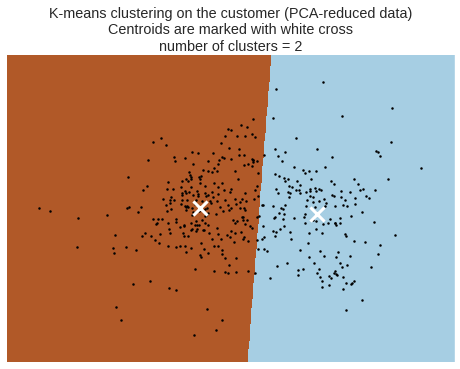

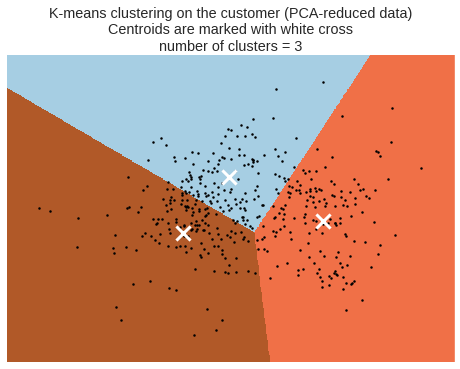

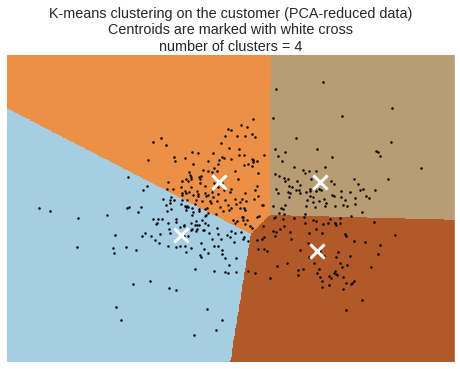

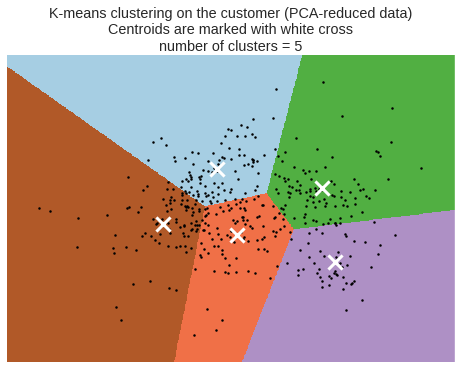

In [346]:
n_clusters = [2,3,4,5]
scores = []
for n_cluster in n_clusters:
    clusterer = KMeans(n_clusters=n_cluster, random_state=33).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    scores.append(silhouette_score(reduced_data,clusterer.labels_))
    kmean_plot(clusterer,reduced_data,n_cluster)
    

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [348]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4785.0,8030.0,11982.0,990.0,4593.0,1116.0
Segment 1,9227.0,1851.0,2391.0,2084.0,295.0,717.0


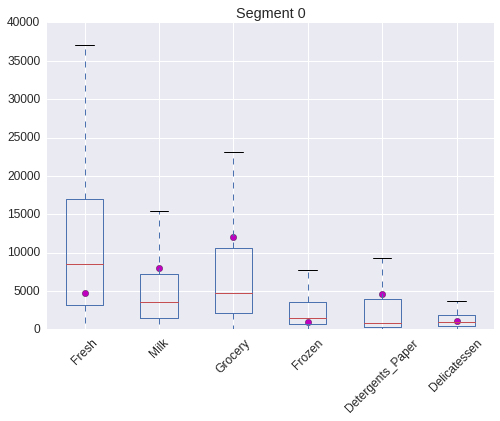

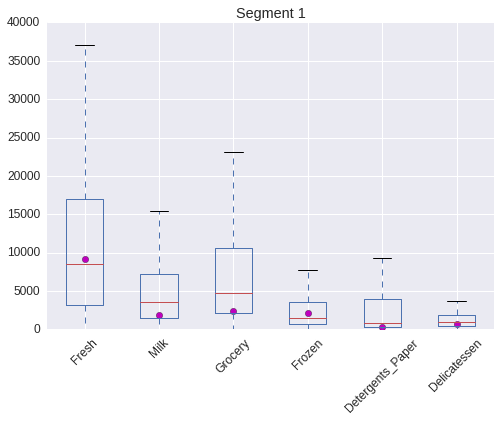

In [386]:
for name in true_centers.index:
    data.plot.box();
    plt.ylim(0,40000)
    plt.xticks(rotation=45);
    xs = [1,2,3,4,5,6]
    plt.scatter(x=xs,y=true_centers.loc[name],c='m',s=40);
    plt.title(str(name));

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

The **Segment 0**'s spending on `Milk`, `Grocery` and `Detergents_paper` was more than 75% percentile of each category while its spending on `Fresh`, `Frozen` and `Delicatessen` was about or below their mean value. This could represent the  a cafe. 

The **Segment 1**'s spending on `Fresh` and `Frozen` is slightly above their mean value while its spending on `Milk`, `Grocey`, and `Detergents_paper` is around 25% percentile. This cold be typical restaurant. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [387]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

The Sample points 0, and 2 fall into cluster 0. The points in this cluster have a larger values of first dimension which is positively corrlated to spending on `Milk`, `Grocery` and `Detergents_paper` Therefore, they may be cafes. Sample point 1 belong to cluster 0 and has a negatively value of the first dimension. Therefore, it may be a restaurant.

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

More frequent delivery would probably have a positive effect on customers of segment 0 as their purchaces in three categories are above 75% percentile. However, segment 1's spending in all categories is around or below mean values and a more frequent delivery is unlikely to lead to a significant effect. To determine the validity of this hypothesis, we can set up an A/B test by changing the delivery schedule on a subset of businesses in segment 0. The null hypothesis is that more frequent delivery will not have a positive affect. The alternative hypothesis is that it would lead to a positive impact. For this purpose, we can set up a one-sided hypothesis test. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

We can label all the current data using their *"cluster segment"* and used them as our training data for a classification problem. As the *"customer segments"* was created based on a kmean clustering and we only have two clusters, I would try a linear model such as logistic regression or SVC with linear kernel first.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

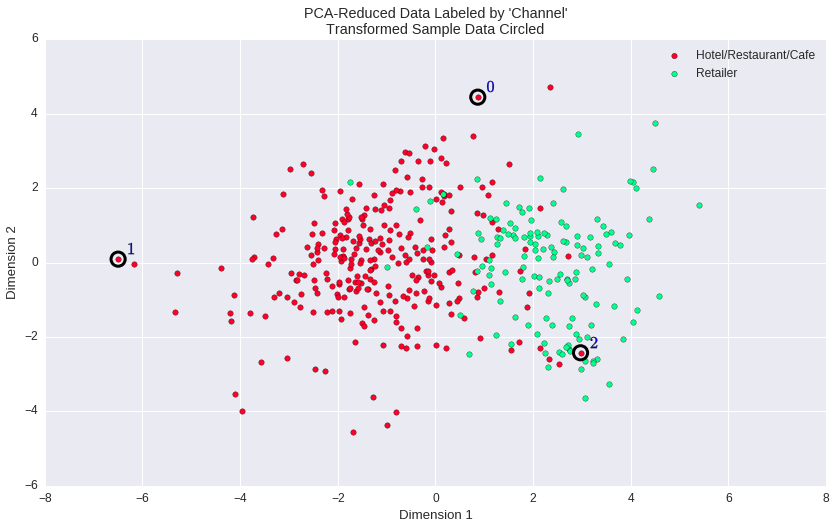

In [388]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The results provided above is consitent with the two clusters that kmean algorithm found in this project. The cafe category is also consistent with my prediction, yet I did not categorized the second cluster as retailer. Moreover, it is clear that the clusters have some overlapping regions which could not be captured with kmean. The regions in the above figure can be divided into three regions. In each cluster we can find a region that purely define each category. However, we need a third relatively big region wich includes the overlapping area between the two clusters. 

In [400]:
print pca.explained_variance_ratio_

[ 0.49186375  0.23626375]


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.